In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        break


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report , auc , accuracy_score

import tensorflow as tf
from tensorflow import keras

from PIL import Image
import cv2
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Dropout,Conv2D, Flatten,MaxPooling2D
from keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory

import warnings
warnings.filterwarnings('ignore')

In [3]:
! git clone https://github.com/AllaVyjayanthi/Plant-Disease-Detection-ML

Cloning into 'Plant-Disease-Detection-ML'...
remote: Enumerating objects: 1563, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 1563 (delta 4), reused 0 (delta 0), pack-reused 1549 (from 1)
Receiving objects: 100% (1563/1563), 1.31 GiB | 33.08 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Updating files: 100% (1536/1536), done.


In [4]:
path = "/content/Plant-Disease-Detection-ML/Train"
train = image_dataset_from_directory(path, batch_size=32,
                                    image_size=(256,256),shuffle=True)

Found 1322 files belonging to 3 classes.


In [5]:
path = "/content/Plant-Disease-Detection-ML/Test"
test = image_dataset_from_directory(path, batch_size=32,
                                    image_size=(256,256),shuffle=True)

Found 150 files belonging to 3 classes.


In [6]:
path = "/content/Plant-Disease-Detection-ML/Validation"
valid = image_dataset_from_directory(path, batch_size=32,
                                    image_size=(256,256),shuffle=True)

Found 60 files belonging to 3 classes.


In [7]:
class_labels = train.class_names
class_labels

['Healthy', 'Powdery', 'Rust']

In [8]:
print(len(train))
print(len(test))
print(len(valid))

42
5
2


## Data Preprocessing

In [9]:
for image_batch,image_label in train.take(1):
    print(image_batch[0])
    print(class_labels[image_label[0].numpy()])

tf.Tensor(
[[[255.       255.       255.      ]
  [255.       255.       255.      ]
  [255.       255.       255.      ]
  ...
  [191.       213.       175.      ]
  [190.       213.       171.      ]
  [184.       210.       165.      ]]

 [[255.       255.       255.      ]
  [255.       255.       255.      ]
  [255.       255.       255.      ]
  ...
  [188.28125  209.125    178.59375 ]
  [194.       215.85352  180.1875  ]
  [189.46875  214.3125   173.25    ]]

 [[255.       255.       255.      ]
  [255.       255.       255.      ]
  [255.       255.       255.      ]
  ...
  [185.       206.59375  171.8125  ]
  [192.       213.       180.      ]
  [198.0957   222.0957   188.0957  ]]

 ...

 [[ 57.492188  96.49219   31.492188]
  [ 54.1875    94.1875    32.1875  ]
  [ 55.177734  93.177734  34.177734]
  ...
  [ 55.3125    95.3125    24.3125  ]
  [ 56.13867   96.13867   25.138672]
  [ 65.0957   101.9082    29.501953]]

 [[ 51.101562  88.15039   22.253906]
  [ 50.94922   89.26172   

## Train Image Data

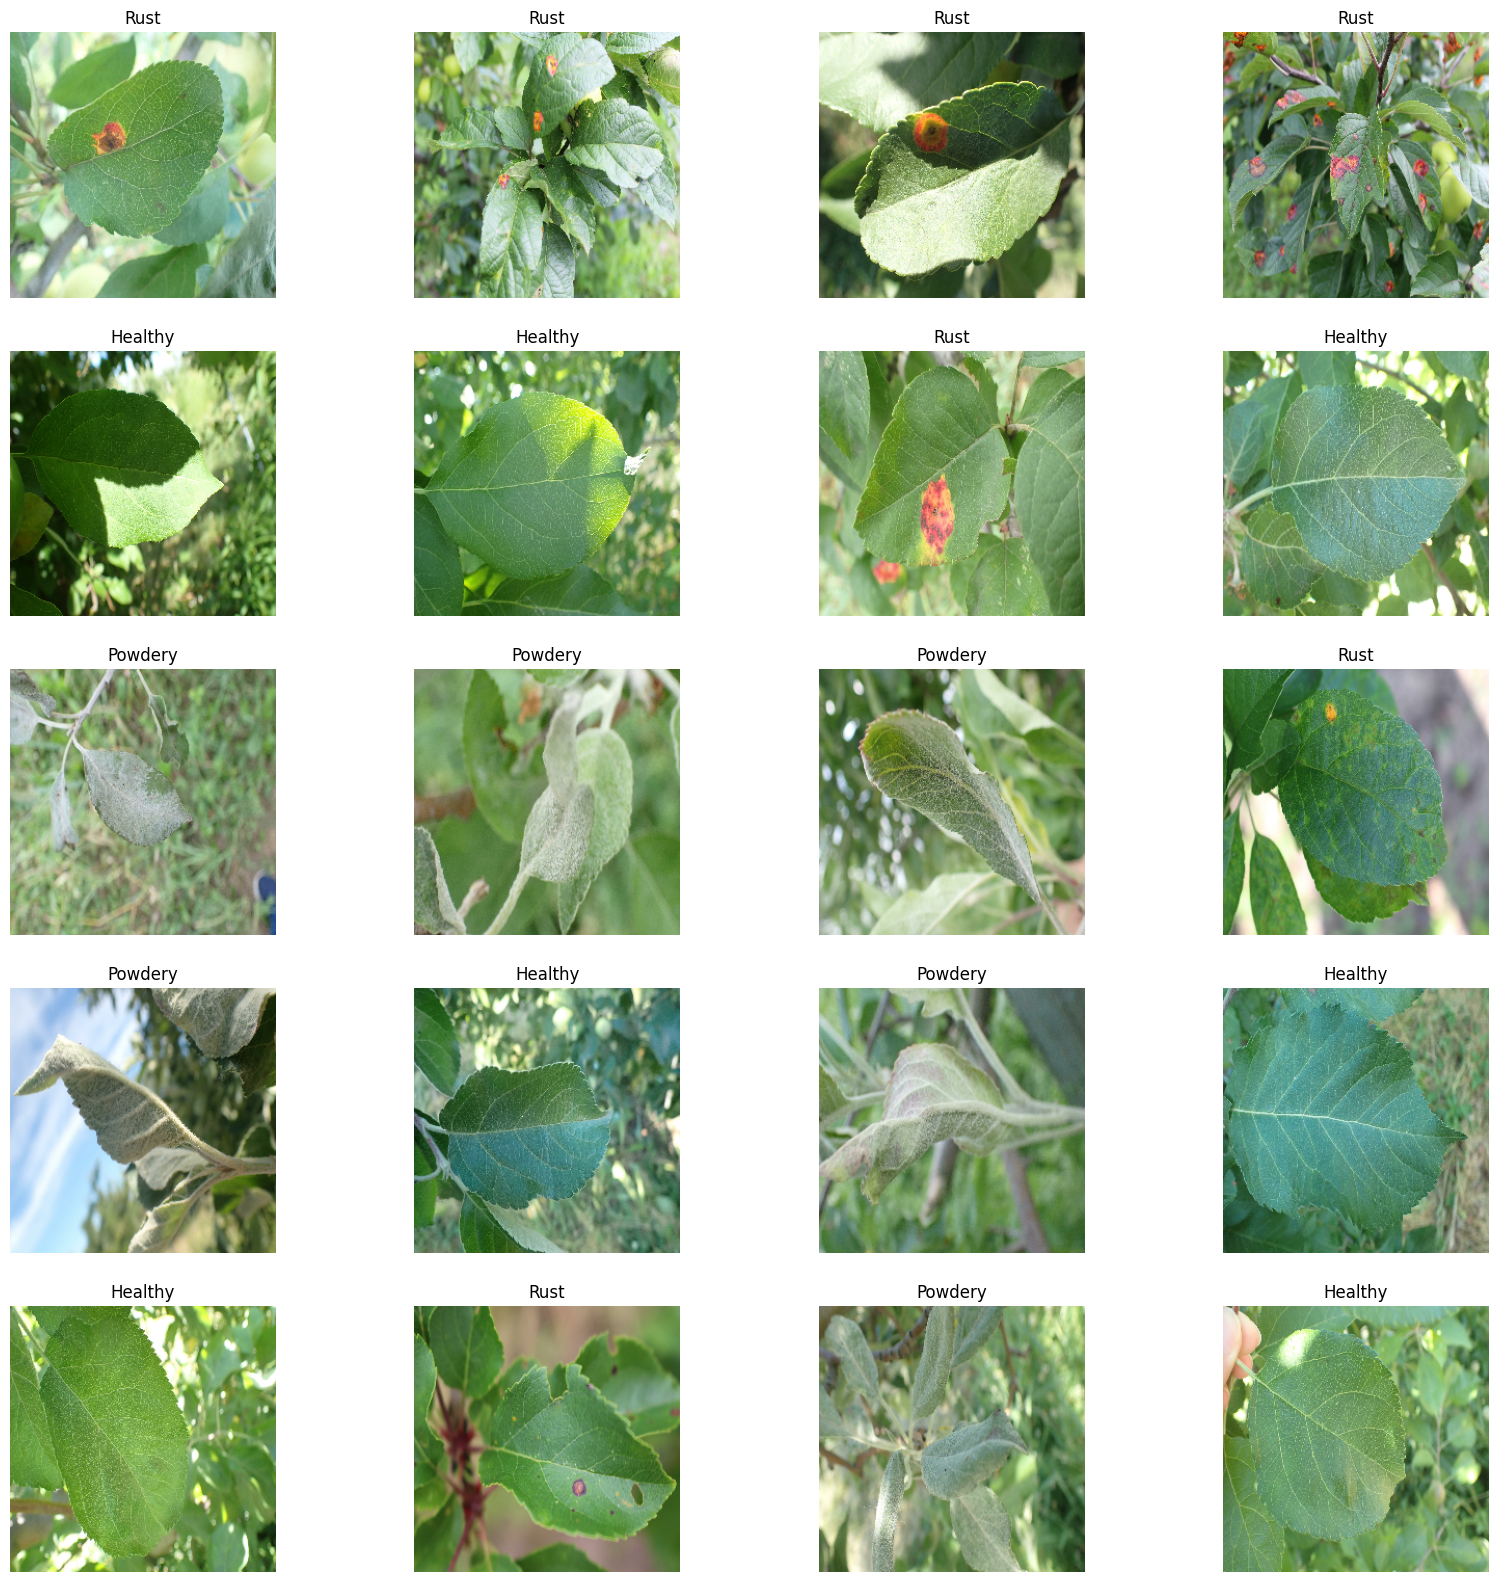

In [10]:
plt.figure(figsize=(20,20))
for image_batch , image_label in train.take(1):
    for i in range(20):
        plt.subplot(5,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_labels[image_label[i].numpy()])
        plt.axis("off")

## Resizing and Rescaling Images

In [13]:
import tensorflow as tf

# Define constants
IMAGE_SIZE = 256
CHANNELS = 3

# Define the input shape
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

# Create the rescaling layer
resizing_and_rescaling = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE, input_shape=input_shape),  # Define input_shape here
    tf.keras.layers.Rescaling(1.0 / 255.0)  # Rescale pixel values to [0, 1]
])

# Define data augmentation (optional, add as needed)
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2)
])

# Build the model
model = tf.keras.models.Sequential([
    resizing_and_rescaling,
    data_augmentation,

    # Convolution layer 1
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    # Convolution layer 2
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    # Convolution layer 3
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    # Convolution layer 4
    tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    # Flatten Layers
    tf.keras.layers.Flatten(),

    # Dense layers
    tf.keras.layers.Dense(units=500, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=500, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print(model.summary())


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_4 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 254, 254, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 127, 127, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 125, 125, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 62, 62, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 500)                 │      50,176,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          50,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,028,379 (198.47 MB)

 Trainable params: 52,028,379 (198.47 MB)

 Non-trainable params: 0 (0.00 B)

None


## Data Augmentation

In [14]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomContrast(0.3),
    tf.keras.layers.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.RandomZoom(0.3),
    tf.keras.layers.RandomRotation(0.2)
])

## Creat CNN Model

In [17]:
import tensorflow as tf

# Define constants
IMAGE_SIZE = 256
CHANNELS = 3
BATCH_SIZE = 32
EPOCHS = 10

# Corrected input shape
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

# Create resizing and rescaling layer
resizing_and_rescaling = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE, input_shape=input_shape),
    tf.keras.layers.Rescaling(1.0 / 255.0)
])

# Define data augmentation (optional)
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2)
])

# Build the model
model = tf.keras.models.Sequential([
    resizing_and_rescaling,
    data_augmentation,

    # Convolution layer 1
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),

    # Convolution layer 2
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),

    # Convolution layer 3
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),

    # Convolution layer 4
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),

    # Flatten Layers
    tf.keras.layers.Flatten(),

    # Dense layers
    tf.keras.layers.Dense(units=500, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=500, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

# Compile the model (no need for explicit build)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Print the model summary
print(model.summary())



Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_11 (Sequential)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_12 (Sequential)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 254, 254, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 127, 127, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 125, 125, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 500)                 │       6,272,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 100)                 │          50,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,685,979 (25.50 MB)

 Trainable params: 6,685,979 (25.50 MB)

 Non-trainable params: 0 (0.00 B)

None


In [18]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_11 (Sequential)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_12 (Sequential)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 254, 254, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 127, 127, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 125, 125, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 500)                 │       6,272,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 100)                 │          50,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,685,979 (25.50 MB)

 Trainable params: 6,685,979 (25.50 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

history = model.fit(train ,  batch_size=32 ,epochs=10,
                verbose=1,
                validation_data=valid) # epochs=10

Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 320s 7s/step - accuracy: 0.3444 - loss: 1.1229 - val_accuracy: 0.3333 - val_loss: 1.0949
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 321s 8s/step - accuracy: 0.3984 - loss: 1.0529 - val_accuracy: 0.6000 - val_loss: 0.7487
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 324s 8s/step - accuracy: 0.6043 - loss: 0.7600 - val_accuracy: 0.5833 - val_loss: 0.7431
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 388s 8s/step - accuracy: 0.6117 - loss: 0.7837 - val_accuracy: 0.6000 - val_loss: 0.6880
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 376s 8s/step - accuracy: 0.6844 - loss: 0.6552 - val_accuracy: 0.6167 - val_loss: 0.6245
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 383s 8s/step - accuracy: 0.7328 - loss: 0.6040 - val_accuracy: 0.7333 - val_loss: 0.6289
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 384s 8s/step - accuracy: 0.8605 - loss: 0.4194 - val_accuracy: 0.8167 - val_loss: 0.5052
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 378s 8s/step - accuracy: 0.8955 - loss: 0.3050 - val_accuracy: 0.8167 - v

## Accuracy and loss on Train and Test

In [20]:
loss,acc = model.evaluate(train)
print("Loss on Train data:",loss)
print("Accuracy on Train data:",acc)
loss1,acc1 = model.evaluate(test)
print("Loss on Test data:",loss1)
print("Accuracy on Test data:",acc1)

42/42 ━━━━━━━━━━━━━━━━━━━━ 129s 3s/step - accuracy: 0.9612 - loss: 0.1218
Loss on Train data: 0.12143421918153763
Accuracy on Train data: 0.9583963751792908
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.9387 - loss: 0.2055
Loss on Test data: 0.25359541177749634
Accuracy on Test data: 0.9266666769981384


In [21]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

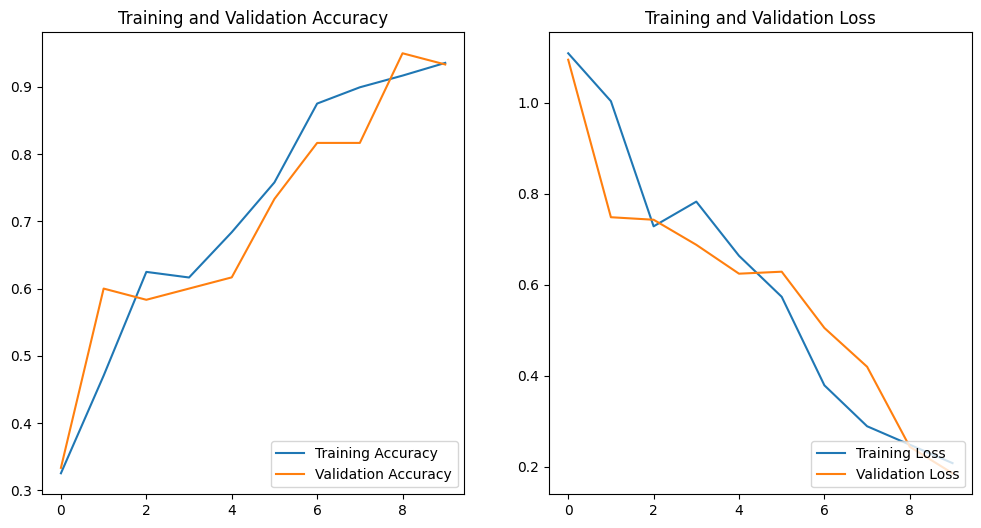

In [22]:
EPOCHS=10
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

#plt.figure(figsize=(6,6))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label="Training Loss")
plt.plot(range(EPOCHS),val_loss, label="Validation Loss")
plt.legend(loc="lower right")
plt.title("Training and Validation Loss")
plt.show()

## Image Predictions on Test Data

In [23]:
def Prediction(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array((images[i].numpy()))
    img_array = tf.expand_dims(img_array,0)     # create a batch

    predictions = model.predict(img_array)

    predicted_class = class_labels[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)

    return predicted_class , confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


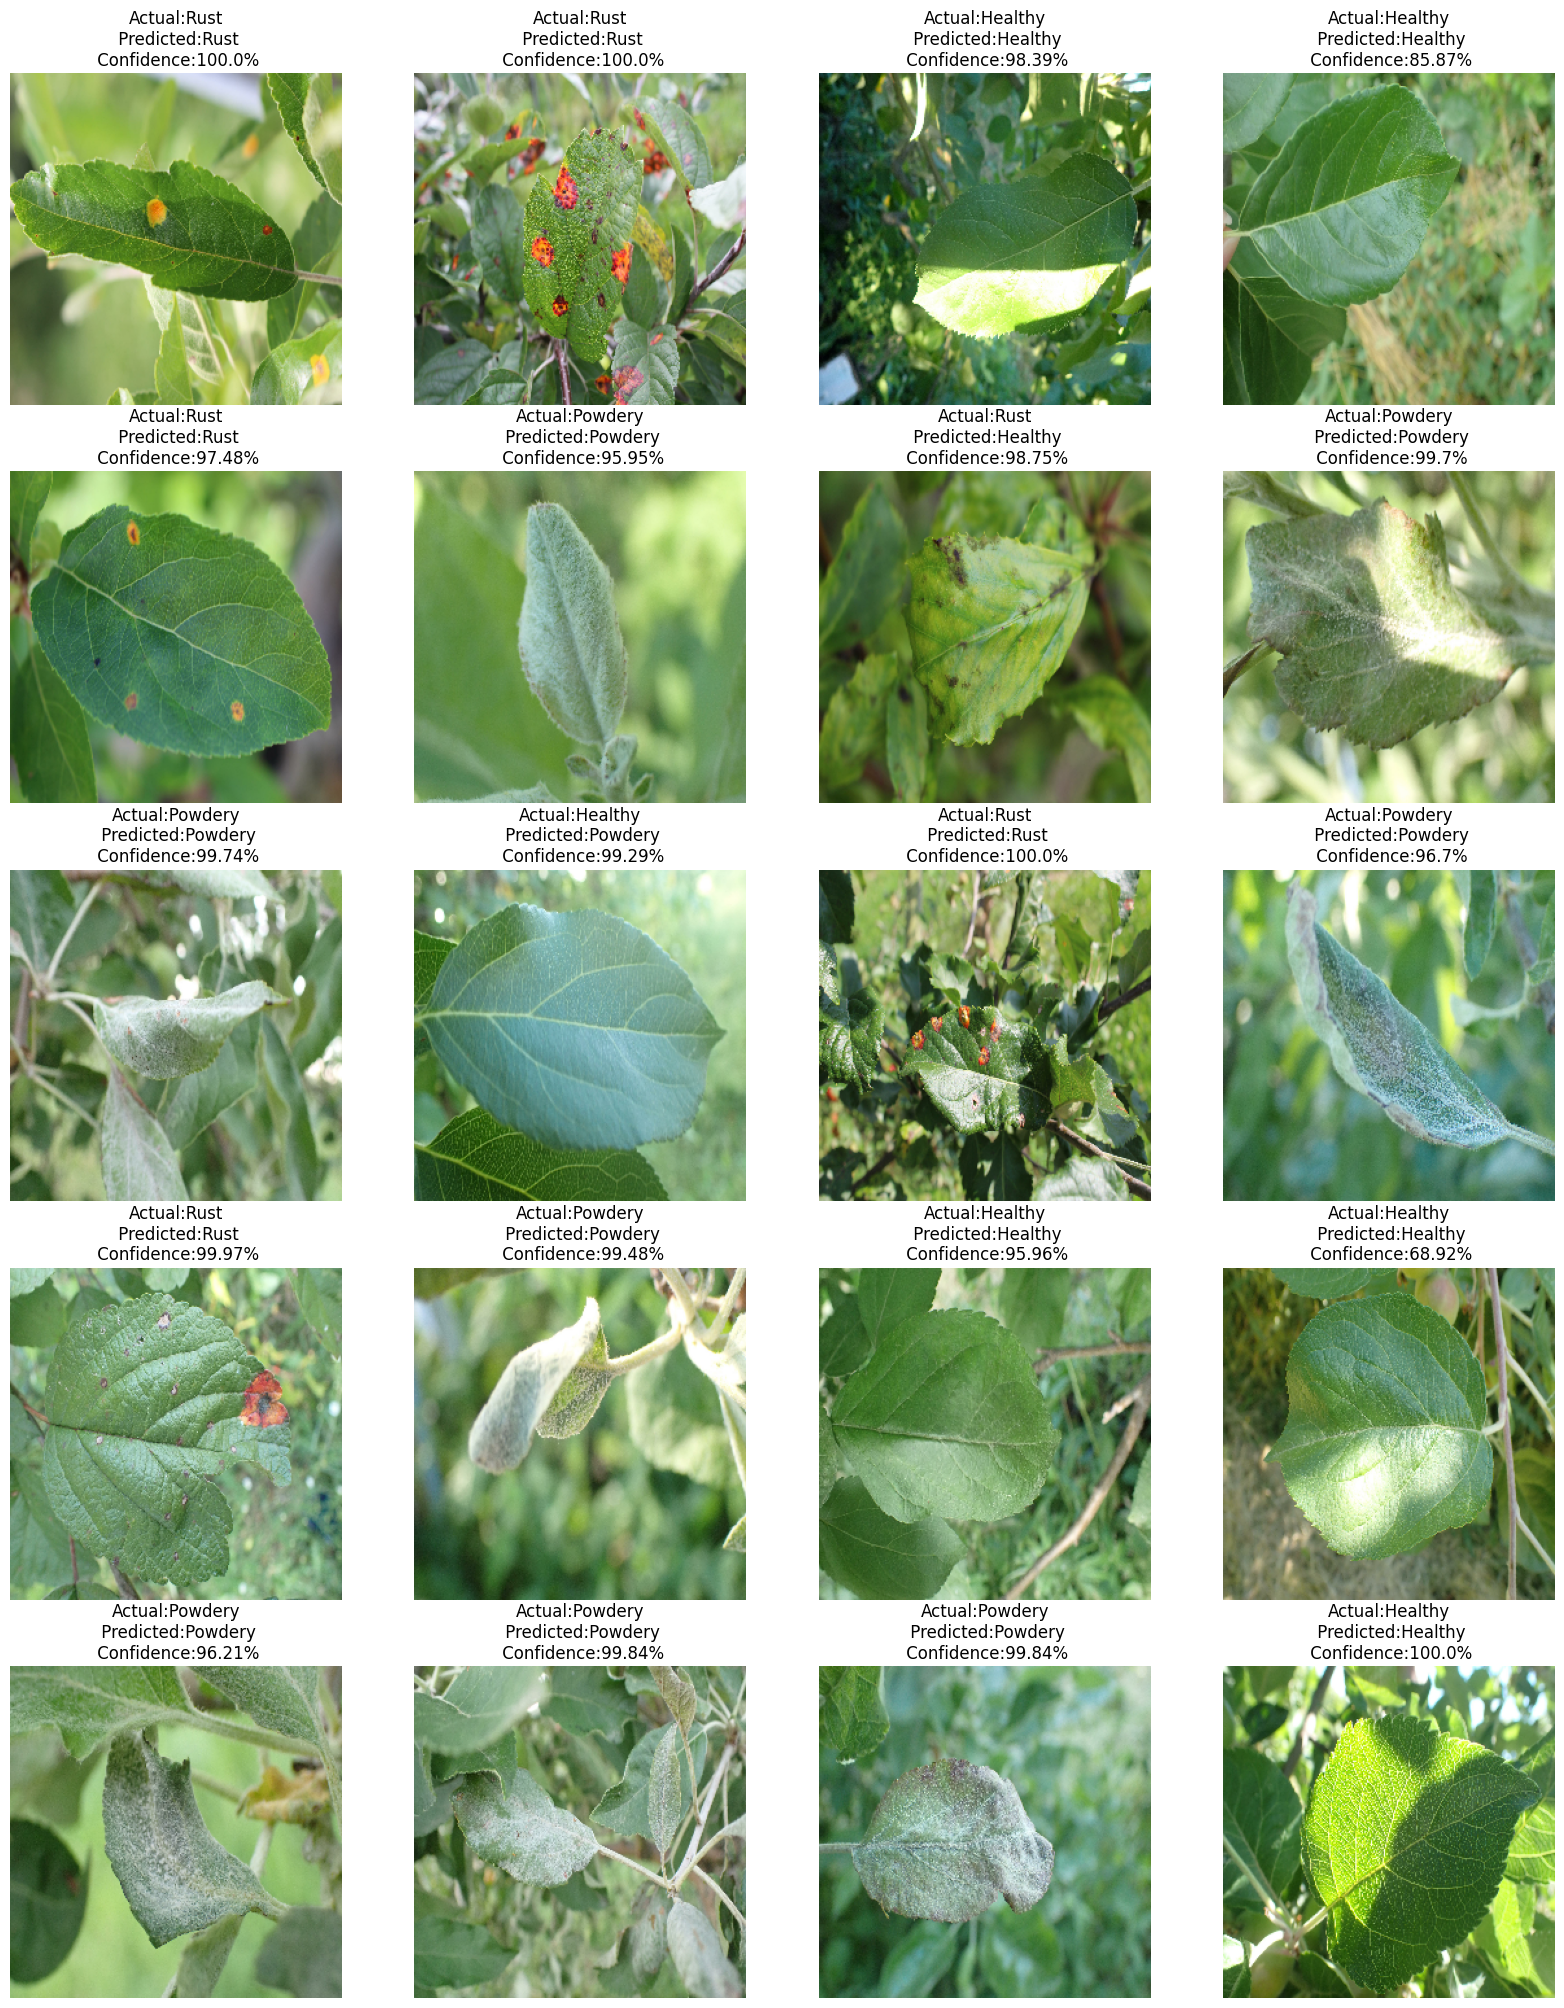

In [24]:
plt.figure(figsize=(20,25))
for images , labels in test.take(1):
    for i in range(20):
        ax = plt.subplot(5,4,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        #plt.title(class_labels[labels[i]])


        predicted_class , confidence = Prediction(model,images[i].numpy())
        actual_class = class_labels[labels[i]]
        plt.title(f"Actual:{actual_class}\n Predicted:{predicted_class}\n Confidence:{confidence}%")
        plt.axis("off")

In [25]:
import pickle

print("saving model..")

# Assuming `model` is your trained model and you want to save it
with open('cnn_model.keras', 'wb') as file:
    pickle.dump(model, file)


saving model..


In [26]:
! pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 93.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.2 MB/s eta 0:00:00


In [27]:
!wget -q -O - ipv4.icanhazip.com

35.236.211.222


In [28]:
!npm install -g localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇
added 22 packages in 5s
⠇
⠇3 packages are looking for funding
⠇  run `npm fund` for details
⠇

In [ ]:
! streamlit run predictV2.py & npx localtunnel --port 8501



⠙⠹⠸⠼⠴⠦⠧
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.236.211.222:8501

your url is: https://spicy-bees-enjoy.loca.lt
2024-12-01 08:40:18.246567: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-01 08:40:18.279688: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-01 08:40:18.289002: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-01 08:40:19.624300: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
